<a href="https://colab.research.google.com/github/KeremAydin98/mnist-classification/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import seaborn as sns


In [ ]:
def get_data():

    (X_train,y_train),(X_test,y_test)=mnist.load_data()

    X_train  = X_train.astype('float32')
    X_test   = X_test.astype('float32')

    #Normalization between 0-1
    X_train = X_train/X_train.max()
    X_test = X_test/X_test.max()

    #Transforming labels into categorical data using one-hot-encoding

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train,y_train,X_test,y_test

In [ ]:
def create_ANN():

  model=Sequential()

  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(32,activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(64,activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(128,activation='relu'))


  model.add(Dense(10,activation='softmax'))

  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

  return model




In [ ]:
def create_CNN():

  model=Sequential()

  model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.1))

  model.add(Conv2D(64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.1))

  model.add(Conv2D(128,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.1))

  model.add(Flatten())

  model.add(Dense(128,activation='relu'))
  model.add(Dense(10,activation='softmax'))

  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

  return model

In [ ]:
X_train,y_train,X_test,y_test = get_data()
model_ANN=create_ANN()
model_CNN=create_CNN()
model_ANN.summary()
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [ ]:
history_ANN = model_ANN.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3885 - accuracy: 0.8811 - val_loss: 0.1776 - val_accuracy: 0.9462
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2148 - accuracy: 0.9340 - val_loss: 0.1462 - val_accuracy: 0.9550
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1866 - accuracy: 0.9406 - val_loss: 0.1264 - val_accuracy: 0.9602
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1663 - accuracy: 0.9495 - val_loss: 0.1240 - val_accuracy: 0.9617
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1524 - accuracy: 0.9524 - val_loss: 0.1126 - val_accuracy: 0.9648
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1451 - accuracy: 0.9544 - val_loss: 0.1055 - val_accuracy: 0.9673
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1357 - accuracy: 0.9569 - val_loss: 0.1135 - val_accuracy:

In [ ]:
history_CNN = model_CNN.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2275 - accuracy: 0.9280 - val_loss: 0.0622 - val_accuracy: 0.9805
Epoch 2/3
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0811 - accuracy: 0.9753 - val_loss: 0.0470 - val_accuracy: 0.9866
Epoch 3/3
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0609 - accuracy: 0.9813 - val_loss: 0.0450 - val_accuracy: 0.9861


In [ ]:
def evaluate_model(model):

  print(str(model))
  print("\n")
  
  y_pred=model.predict(X_test)
  y_pred=np.argmax(y_pred, axis=1)
  y_test_class=np.argmax(y_test, axis=1)

  print("Classification Report: \n")
  print(classification_report(y_test_class,y_pred))

  data={"y_Actual":y_test_class,"y_Predicted":y_pred}
  df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
  confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

  plt.figure(figsize=(10,10))
  sns.heatmap(confusion_matrix, annot=True)
  plt.show()
  print("\n")




Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.95      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.98      0.98       958
           7       0.94      0.99      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



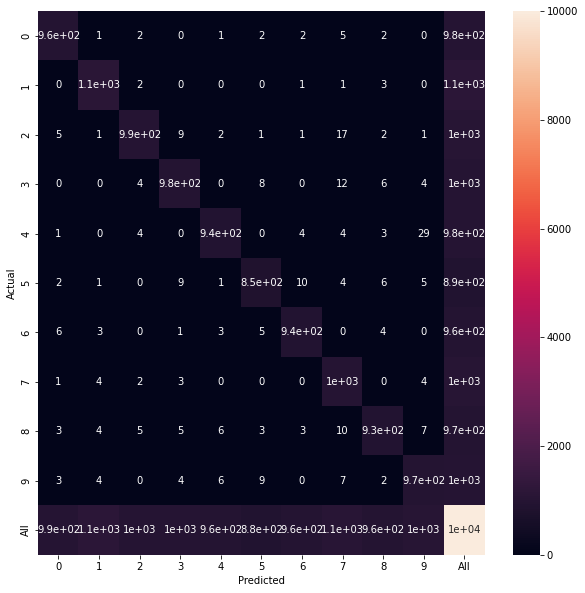





Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



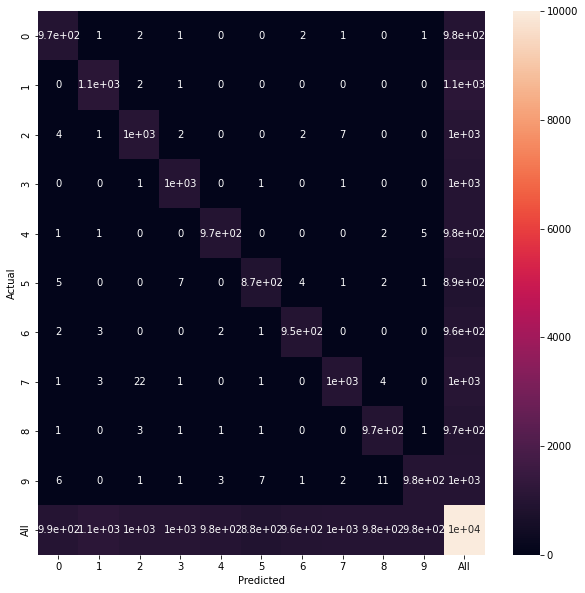

In [ ]:
evaluate_model(model_ANN)
evaluate_model(model_CNN)

In [ ]:
def compare_pred_with_actual(model):

  figure,ax=plt.subplots(1,5,figsize=(10,10))

  y_pred=np.zeros(shape=())

  for i in range(5):

    random_value=np.random.randint(low=0,high=10000)
    y_pred = model.predict(X_test)
       

    y_predicted=np.argmax(y_pred[random_value], axis=0)
    y_original=np.argmax(y_test[random_value], axis=0)


    ax[i].imshow(X_test[random_value],cmap='gray')	
    ax[i].set_title("True: %s \nPredict: %s" % (str(y_original), str(y_predicted)))



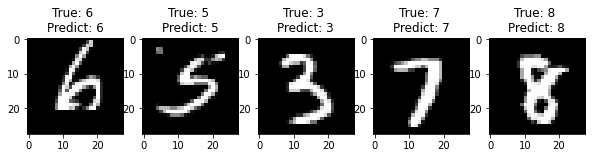

In [ ]:
compare_pred_with_actual(model_ANN)

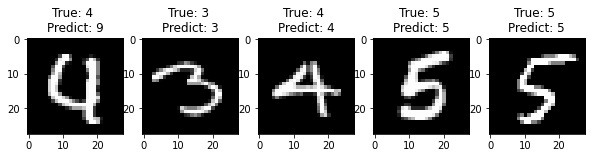

In [ ]:
compare_pred_with_actual(model_CNN)

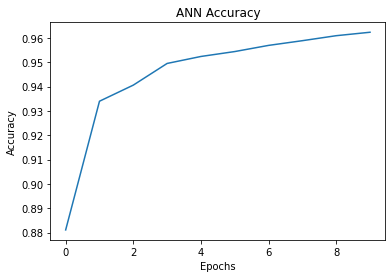

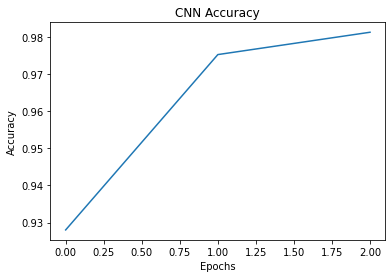

In [81]:
plot1 = plt.figure(1)
plt.plot(history_ANN.history['accuracy'],label='accuracy')
plt.title("ANN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plot2 = plt.figure(2)

plt.plot(history_CNN.history['accuracy'],label='accuracy')
plt.title("CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()